<a href="https://colab.research.google.com/github/Sasso28/Baby-Steps/blob/main/Real_life_cars_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             Brand          Price   Body  ...  Registration         Year    Model
count         3867    3867.000000   3867  ...          3867  3867.000000     3867
unique           7            NaN      6  ...             2          NaN      291
top     Volkswagen            NaN  sedan  ...           yes          NaN  E-Class
freq           848            NaN   1467  ...          3505          NaN      181
mean           NaN   18194.455679    NaN  ...           NaN  2006.709853      NaN
std            NaN   19085.855165    NaN  ...           NaN     6.103870      NaN
min            NaN     800.000000    NaN  ...           NaN  1988.000000      NaN
25%            NaN    7200.000000    NaN  ...           NaN  2003.000000      NaN
50%            NaN   11700.000000    NaN  ...           NaN  2008.000000      NaN
75%            NaN   21700.000000    NaN  ...           NaN  2012.000000      NaN
max            NaN  129222.000000    NaN  ...           NaN  2016.000000      NaN

[11 rows x 9 co

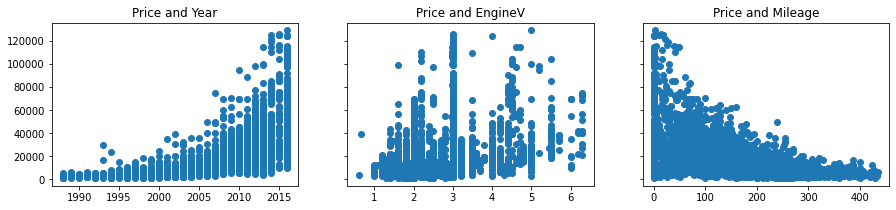

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#1st step, read the csv file in order to analyze it. Heas to take a quick look to the file
path = r'/content/drive/MyDrive/1.04. Real-life example - Copy.csv'
raw_data = pd.read_csv(path)
raw_data.head()


#PREPROCESSING
#Exploring descriptive variables; the argument is needed to output also categorical values 
raw_data.describe(include = 'all')

'''
commenting results:
- Registration is a boolean where almost all the cars has the same value: not that useful;
- There too many different models in order to create enough dummy variables; Model is not that useful;
- Price and EngineV have some Nan values
'''
raw_data.drop(['Model'],axis = 1)
raw_data.isnull().sum()

#if the isnull().sum() returns back a number that is lower than 5% of the total cases, we can just remove this observations

data_no_mv = raw_data.dropna(axis = 0)

#analysis of values, let's try a plot to find out if there are outliers
#sns.distplot(data_no_mv['Price'])

#to remove outliers, I can take off the 1% of max values presented in the chart
# q = value of the 99th percentile, int
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
#sns.distplot(data_1['Price'])

#same thing with Milage
#sns.distplot(data_1['Mileage'])
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
#sns.distplot(data_2['Mileage'])

#same thing with EngineV
#sns.distplot(data_1['EngineV'])
data_1['EngineV'].describe()
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis = 0)
EngV.sort_values(by = 'EngineV')
#google search: engines have max 6.5, so let's take off the bigger values
data_3 = data_2[data_2['EngineV'] < 6.5]

#same thing with Year, the difference is that outliers are in the lower end
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

#reindexing the values after the cleaning
data_cleaned = data_4.reset_index(drop=True)
print(data_cleaned.describe(include = 'all'))



# plot the interested plots in order to control take a look at their correlation

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

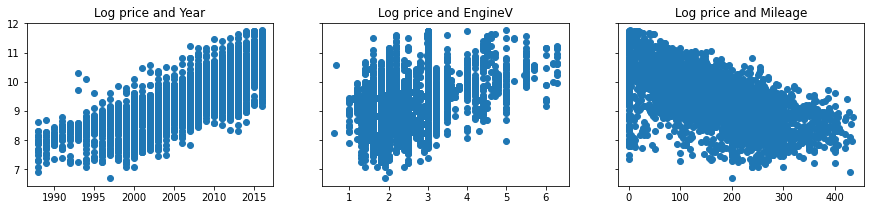

In [6]:
#each graph is not following a normal distribution, one of the condition to make a multiple linear regression
#let's transformate the distribution to log, in order to ressemble the distribution 
log_price = np.log(data_cleaned['Price'])
#insert the values as a newly created variables
data_cleaned['log_price'] = log_price

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log price and Mileage')
#it's possible to drop the price value, as no longer needed
data_cleaned = data_cleaned.drop(['Price'],axis = 1)

In [7]:
#2nd assumption, is "NO ENDOGENITY"

#3rd assumption, NORMALITY + HOMOSCEDATICITY

#4th no autocorrelation
#being each buy a different product bought by a different customer, there's no threat of autocorrelation

#5th multicollinearity
print(data_cleaned.columns.values)
#we can expect some multicollinearity between 'Year' and 'Mileage'



['Brand' 'Body' 'Mileage' 'EngineV' 'Engine Type' 'Registration' 'Year'
 'Model' 'log_price']
